<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(3_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_3.2_n250.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,40.973731,64.916878,89.006892,69.351120,321.448828,595.697449,300.534826,295.162623
1,0.0,1.0,60.618553,29.457934,45.195702,78.303335,-11.833331,211.742194,171.148591,40.593604
2,0.0,2.0,53.246680,98.381526,43.843237,57.899372,391.241926,654.612742,251.522479,403.090263
3,0.0,3.0,65.119837,61.395674,30.746192,94.790555,19.903967,281.956225,201.751581,80.204644
4,0.0,4.0,47.988061,25.088852,79.815382,68.254049,-92.567229,138.579115,228.870307,-90.291192
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.527075,50.986989,52.953935,92.502405,231.753392,528.723795,404.819181,123.904614
249996,999.0,246.0,87.465745,88.960916,43.115758,61.336699,-994.158613,-703.279495,459.264908,-1162.544403
249997,999.0,247.0,90.321709,72.323980,88.439387,49.703298,-164.397986,146.390388,448.555754,-302.165367
249998,999.0,248.0,20.452506,28.130176,79.811116,89.782921,-57.268686,170.908033,165.769040,5.138993


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,40.973731,64.916878,89.006892,69.351120,321.448828,595.697449,300.534826,295.162623
1,0.0,1.0,60.618553,29.457934,45.195702,78.303335,-11.833331,211.742194,171.148591,40.593604
2,0.0,2.0,53.246680,98.381526,43.843237,57.899372,391.241926,654.612742,251.522479,403.090263
3,0.0,3.0,65.119837,61.395674,30.746192,94.790555,19.903967,281.956225,201.751581,80.204644
4,0.0,4.0,47.988061,25.088852,79.815382,68.254049,-92.567229,138.579115,228.870307,-90.291192
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.527075,50.986989,52.953935,92.502405,231.753392,528.723795,404.819181,123.904614
249996,999.0,246.0,87.465745,88.960916,43.115758,61.336699,-994.158613,-703.279495,459.264908,-1162.544403
249997,999.0,247.0,90.321709,72.323980,88.439387,49.703298,-164.397986,146.390388,448.555754,-302.165367
249998,999.0,248.0,20.452506,28.130176,79.811116,89.782921,-57.268686,170.908033,165.769040,5.138993


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    40.973731  64.916878  89.006892  69.351120   321.448828   
      1.0    60.618553  29.457934  45.195702  78.303335   -11.833331   
      2.0    53.246680  98.381526  43.843237  57.899372   391.241926   
      3.0    65.119837  61.395674  30.746192  94.790555    19.903967   
      4.0    47.988061  25.088852  79.815382  68.254049   -92.567229   
...                ...        ...        ...        ...          ...   
999.0 245.0  90.527075  50.986989  52.953935  92.502405   231.753392   
      246.0  87.465745  88.960916  43.115758  61.336699  -994.158613   
      247.0  90.321709  72.323980  88.439387  49.703298  -164.397986   
      248.0  20.452506  28.130176  79.811116  89.782921   -57.268686   
      249.0  28.308234  81.192966  71.619066  45.027498 -2061.348404   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     595.697449  300.534826   295.162623  
      1.0     211.742194  171.148591    40.593604  
      2.0     654.612742  251.522479   403.090263  
      3.0     281.956225  201.751581    80.204644  
      4.0     138.579115  228.870307   -90.291192  
...                  ...         ...          ...  
999.0 245.0   528.723795  404.819181   123.904614  
      246.0  -703.279495  459.264908 -1162.544403  
      247.0   146.390388  448.555754  -302.165367  
      248.0   170.908033  165.769040     5.138993  
      249.0 -1825.200641  279.673063 -2104.873704  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    40.973731  64.916878  89.006892  69.351120   321.448828   
      1.0    60.618553  29.457934  45.195702  78.303335   -11.833331   
      2.0    53.246680  98.381526  43.843237  57.899372   391.241926   
      3.0    65.119837  61.395674  30.746192  94.790555    19.903967   
      4.0    47.988061  25.088852  79.815382  68.254049   -92.567229   
...                ...        ...        ...        ...          ...   
999.0 245.0  90.527075  50.986989  52.953935  92.502405   231.753392   
      246.0  87.465745  88.960916  43.115758  61.336699  -994.158613   
      247.0  90.321709  72.323980  88.439387  49.703298  -164.397986   
      248.0  20.452506  28.130176  79.811116  89.782921   -57.268686   
      249.0  28.308234  81.192966  71.619066  45.027498 -2061.348404   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     595.697449  300.534826   295.162623  
      1.0     211.742194  171.148591    40.593604  
      2.0     654.612742  251.522479   403.090263  
      3.0     281.956225  201.751581    80.204644  
      4.0     138.579115  228.870307   -90.291192  
...                  ...         ...          ...  
999.0 245.0   528.723795  404.819181   123.904614  
      246.0  -703.279495  459.264908 -1162.544403  
      247.0   146.390388  448.555754  -302.165367  
      248.0   170.908033  165.769040     5.138993  
      249.0 -1825.200641  279.673063 -2104.873704  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,40.973731,64.916878,89.006892,69.351120,321.448828,595.697449,300.534826,295.162623
1,0.0,1.0,60.618553,29.457934,45.195702,78.303335,-11.833331,211.742194,171.148591,40.593604
2,0.0,2.0,53.246680,98.381526,43.843237,57.899372,391.241926,654.612742,251.522479,403.090263
3,0.0,3.0,65.119837,61.395674,30.746192,94.790555,19.903967,281.956225,201.751581,80.204644
4,0.0,4.0,47.988061,25.088852,79.815382,68.254049,-92.567229,138.579115,228.870307,-90.291192
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,90.527075,50.986989,52.953935,92.502405,231.753392,528.723795,404.819181,123.904614
249996,999.0,246.0,87.465745,88.960916,43.115758,61.336699,-994.158613,-703.279495,459.264908,-1162.544403
249997,999.0,247.0,90.321709,72.323980,88.439387,49.703298,-164.397986,146.390388,448.555754,-302.165367
249998,999.0,248.0,20.452506,28.130176,79.811116,89.782921,-57.268686,170.908033,165.769040,5.138993


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    40.973731  64.916878  89.006892  69.351120   321.448828   
      1.0    60.618553  29.457934  45.195702  78.303335   -11.833331   
      2.0    53.246680  98.381526  43.843237  57.899372   391.241926   
      3.0    65.119837  61.395674  30.746192  94.790555    19.903967   
      4.0    47.988061  25.088852  79.815382  68.254049   -92.567229   
...                ...        ...        ...        ...          ...   
999.0 245.0  90.527075  50.986989  52.953935  92.502405   231.753392   
      246.0  87.465745  88.960916  43.115758  61.336699  -994.158613   
      247.0  90.321709  72.323980  88.439387  49.703298  -164.397986   
      248.0  20.452506  28.130176  79.811116  89.782921   -57.268686   
      249.0  28.308234  81.192966  71.619066  45.027498 -2061.348404   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     595.697449  300.534826   295.162623  
      1.0     211.742194  171.148591    40.593604  
      2.0     654.612742  251.522479   403.090263  
      3.0     281.956225  201.751581    80.204644  
      4.0     138.579115  228.870307   -90.291192  
...                  ...         ...          ...  
999.0 245.0   528.723795  404.819181   123.904614  
      246.0  -703.279495  459.264908 -1162.544403  
      247.0   146.390388  448.555754  -302.165367  
      248.0   170.908033  165.769040     5.138993  
      249.0 -1825.200641  279.673063 -2104.873704  

[250000 rows x 8 columns]

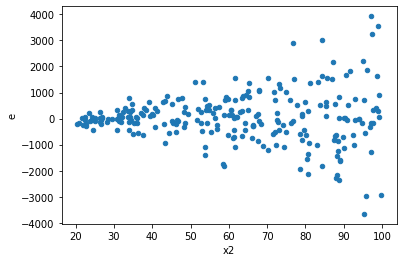

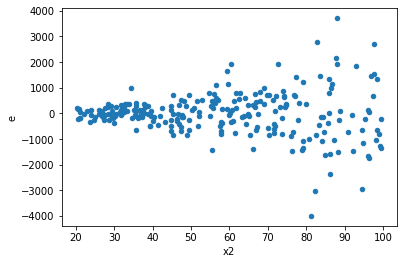

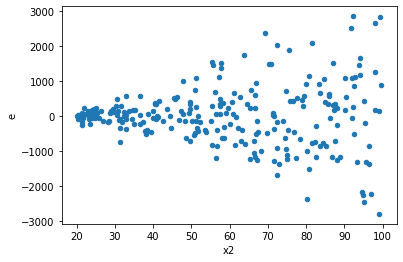

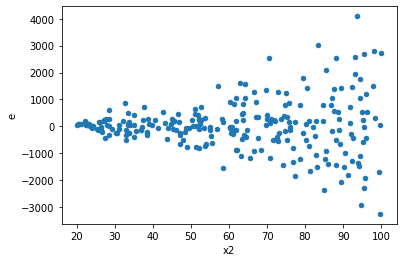

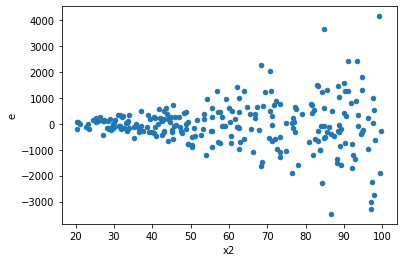

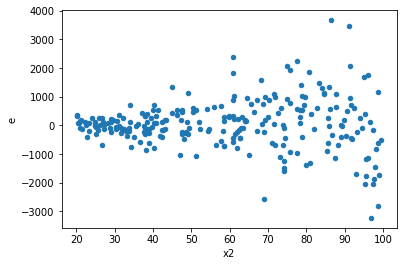

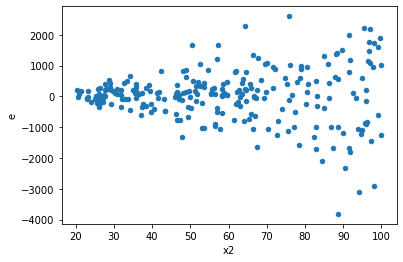

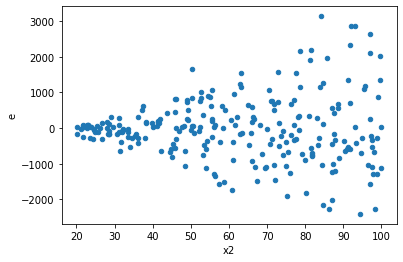

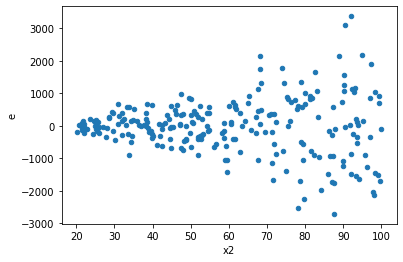

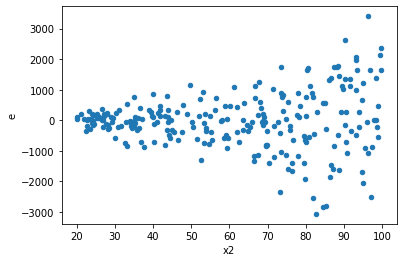

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,96.0,96.0,73987645.6175217,87256794.20988436,770704.6418491844,908924.9396862955,1.1793427602894322,0.42049331809893076,0.7897533409505346,0.21024665904946538,Reject001=1 : Homoscedasticity
3.0,96.0,96.0,70820721.56613168,97689499.04714134,737715.849647205,1017598.9484077223,1.3793914674523595,0.11681982401131163,0.9415900879943442,0.05840991200565582,Reject001=1 : Homoscedasticity
5.0,96.0,96.0,54517552.55061909,83822687.83147708,567891.1724022821,873152.9982445529,1.5375357826939942,0.0362628800960616,0.9818685599519692,0.0181314400480308,Reject001=1 : Homoscedasticity
7.0,96.0,96.0,57801773.950924516,100539498.6727414,602101.811988797,1047286.4445077229,1.7393843095214088,0.0071933825153407405,0.9964033087423296,0.0035966912576703702,Reject001=0 : Heteroscedasticity
9.0,96.0,96.0,31768637.549361873,126426955.23523378,330923.30780585285,1316947.4503670186,3.9796152743029194,7.683276237457903e-11,0.9999999999615836,3.8416381187289517e-11,Reject001=0 : Heteroscedasticity
12.0,96.0,96.0,72661722.18782933,73757299.57777472,756892.9394565555,768305.2039351533,1.015077779014284,0.9417079304528708,0.5291460347735646,0.4708539652264354,Reject001=1 : Homoscedasticity
13.0,96.0,96.0,22568230.182518907,150664819.19867808,235085.7310679053,1569425.1999862299,6.6759696254507945,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
14.0,96.0,96.0,15285469.517502084,138159327.96495068,159223.64080731338,1439159.6663015697,9.038605442034754,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
18.0,96.0,96.0,37627742.323212974,124860638.02931271,391955.64920013514,1300631.646138674,3.3183133060918406,1.2084571121562249e-08,0.9999999939577144,6.042285560781124e-09,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,73987645.6175217,87256794.20988436,770704.6418491844,908924.9396862955,1.1793427602894322,0.42049331809893076,Reject001=1 : Homoscedasticity
1.0,96.0,96.0,84293148.25741616,55071846.53720964,878053.6276814183,573665.0680959338,0.6533371653058929,0.038252934436922695,Reject001=1 : Homoscedasticity
2.0,96.0,96.0,79592156.27089569,65053683.96977224,829084.9611551635,677642.5413517941,0.817337876214321,0.3247536137944776,Reject001=1 : Homoscedasticity
3.0,96.0,96.0,70820721.56613168,97689499.04714134,737715.849647205,1017598.9484077223,1.3793914674523595,0.11681982401131163,Reject001=1 : Homoscedasticity
4.0,96.0,96.0,86919282.77783573,51658041.59571425,905409.1956024555,538104.5999553568,0.5943219955893029,0.011458813766216871,Reject001=1 : Homoscedasticity
5.0,96.0,96.0,54517552.55061909,83822687.83147708,567891.1724022821,873152.9982445529,1.5375357826939942,0.0362628800960616,Reject001=1 : Homoscedasticity
6.0,96.0,96.0,71990488.958616,55141419.001230575,749900.92665225,574389.7812628185,0.7659542225491596,0.19328758609967078,Reject001=1 : Homoscedasticity
7.0,96.0,96.0,57801773.950924516,100539498.6727414,602101.811988797,1047286.4445077229,1.7393843095214088,0.0071933825153407405,Reject001=0 : Heteroscedasticity
8.0,96.0,96.0,84120867.75305036,51756873.00893875,876259.0390942745,539134.093843112,0.6152679399465891,0.018188788678144253,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    663
Reject001=1 : Homoscedasticity      337
Name: Result_test, dtype: int64